<h2 align='center'>  Arboles de Decisión </h2> 

Los árboles de decisión trabajan de manera descendente y la división de nodos es un concepto importante para cualquier algoritmo de árboles de decisión. La mayoría de los algorítmos tienen un enfoque codicioso a la hora de dividir el espacio de entrada en subconjuntos.

El proceso más básico en términos simples es probar y dividir los datos usando diferentes atributos y funciones de costo. En cada paso se selecciona la división que ressulta menos costosa. Los problemas de clasificación y regresión utilizan diferentes funciones de costos. Algunas de estas se mencionan a continuación:

* **Error Cuadrático Medio**: Es usada principalmente para árboles de regresión, esta calcula el cuadrado de las diferencias entre el valor observado y predicho.

* **Error Absoluto Medio**: Es usada para árboles de regresión, es similar al error cuadrático medio, solo que usa la diferencia en valor absoluto. 

* **Reducción de Varianza**:  Este fue el primero que se introdujo con el algoritmo CART. Se usa la fórmula estándar de la varianza y se selecciona aquel resultado que minimiza la varianza.

* **Impureza de Gini**: Es usado principalmente en clasificación, esta medida viene dada por:
 $$\displaystyle\mbox{Gini(t)} = 1-\sum_{i=0}^{c-1}[p(i/t)]^2$$


* **Ganancia de información**: Es utilizado en árboles de clasificación, en este caso la partición busca aumentar la pureza respecto al nodo padre. Los criterios usado para medir la impureza son los siguientes:

* $\displaystyle\mbox{Entropia(t)} = -\sum_{i=0}^{c-1}p(i/t)log_{2}(p(i/t))$

* $\displaystyle\mbox{Gini(t)} = 1-\sum_{i=0}^{c-1}[p(i/t)]^2$

* $\displaystyle \mbox{Error de clasificacion(t)} = 1 - \max_{i}[p(i/t)]$

## Criterios para detener una partición

Existen diferentes criterios para evitar que un árbol crezca hasta alcanzar demasiada complejidad, algunos de estos criterios son:

* **Prepoda**: Consiste en definir un umbral para la Ganancia de Información y si, en un nodo determinado, ninguna de las particiones proporciona una ganancia mayor al umbral, se para el desarrollo de subárboles en dicho nodo. es facil de implementar, sin embargo tiene la desventaja que no se conoce a priori el umbral óptimo.

* **Poda**: Consiste en desarrollar el árbol completo hasta tener particiones completamente puras y a partir de allí comenzar a eliminar ramas del árbol usando algún criterio. Los dos criterios más utilizados son:
    * Reemplazar subárboles por hojas si estos no proporcionan una ganacia suficiente de información.
    * Reemplazar subárboles por árboles más simples.

# Jugar con la BDD

In [13]:
from sklearn import datasets, metrics
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Importar DataSet

In [14]:
dataframe = pd.read_excel('../bdd/bdd.xlsx')
columnas = ['SEX', 'Age', 'Cardiac FQ', 'Systolic BP', 'Diastolic BP', 'Hb A/C  %', 'Total Cholest', 'TRIGLICERIDOS', 'LDL', 'HDL', 'HCTO', 'HB', 'Platelets', 'INR', 'Leucocytes', 'C.R.P', 'Ureic nitrogen', 'Uremia', 'Creatinin', 'TTPA', 'TP', 'NA (sodium)', 'CL (Chloride)', 'Fosfatase Alcalin', 'Gamma glutamil', 'GLASGOW at admission'] # Columnas a trabajar
dataset = dataframe[[*columnas]]
dataset.head(5)

,SEX,Age,Cardiac FQ,Systolic BP,Diastolic BP,Hb A/C %,Total Cholest,TRIGLICERIDOS,LDL,HDL,...,Ureic nitrogen,Uremia,Creatinin,TTPA,TP,NA (sodium),CL (Chloride),Fosfatase Alcalin,Gamma glutamil,GLASGOW at admission
0,1,53,78,162,64,5.9,268,130,202,40,...,21.13,45.22,0.93,21.8,11.0,137.83,101.88,81.53,41.66,11
1,1,54,56,130,89,6.5,187,130,118,44,...,18.00,39.00,0.90,31.0,16.0,139.00,102.00,98.00,40.00,15
2,2,78,91,152,75,13.8,159,97,26,35,...,12.68,27.14,0.74,26.3,9.8,137.00,101.00,80.38,130.39,15
3,2,87,59,136,86,5.9,193,133,115,51,...,24.10,51.60,0.92,27.2,10.1,137.10,106.45,120.20,33.95,15
4,1,69,104,154,95,16.7,184,137,125,32,...,16.69,35.72,1.05,24.2,13.0,137.70,103.80,98.00,40.00,15


In [15]:
X = dataset.drop('Age',axis=1)
y = dataset['Age']

## Escalamos los Datos

Nomalizamos lo datos

In [16]:
sc =StandardScaler()
sc.fit(X)
X = sc.transform(X)

### Separamos el dataset
Separamos el dato de entrenamiento y el de validación

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Creamos el modelo y entrenamos

In [26]:
clf = tree.DecisionTreeClassifier(criterion = 'gini', random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

## Generamos métricas para evaluar el modelo

### Fase de entrenamiento

In [28]:
print("Entrenamiento - Accuracy :", metrics.accuracy_score(y_train, clf.predict(X_train)))

Entrenamiento - Accuracy : 1.0


### Matriz de Confusion

In [29]:
print("Entrenamiento - Matriz de Confusión :\n",metrics.confusion_matrix(y_train, clf.predict(X_train)))

Entrenamiento - Matriz de Confusión :
 [[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [30]:
print("Entrenamiento - Reporte de clasificación:\n", metrics.classification_report(y_train, clf.predict(X_train)))

Entrenamiento - Reporte de clasificación:
               precision    recall  f1-score   support

          52       1.00      1.00      1.00         1
          53       1.00      1.00      1.00         1
          54       1.00      1.00      1.00         2
          55       1.00      1.00      1.00         1
          57       1.00      1.00      1.00         1
          62       1.00      1.00      1.00         1
          65       1.00      1.00      1.00         1
          67       1.00      1.00      1.00         1
          69       1.00      1.00      1.00         1
          70       1.00      1.00      1.00         1
          71       1.00      1.00      1.00         3
          72       1.00      1.00      1.00         2
          73       1.00      1.00      1.00         1
          75       1.00      1.00      1.00         1
          77       1.00      1.00      1.00         1
          78       1.00      1.00      1.00         1
          79       1.00      1.00     

### Fase de validación

In [31]:
print("Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(X_test)))
print("Test - Matriz de Confusión :\n",metrics.confusion_matrix(y_test, clf.predict(X_test)))
print("Test - Reporte de clasificación :\n", metrics.classification_report(y_test, clf.predict(X_test)))

Test - Accuracy : 0.0
Test - Matriz de Confusión :
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]]
Test - Reporte de clasificación :
               precision    recall  f1-score   suppor

C:\Users\Abraham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abraham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abraham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, m

# Grafica

In [32]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
from matplotlib import pyplot as plt

AttributeError: 'DataFrame' object has no attribute 'feature_names'

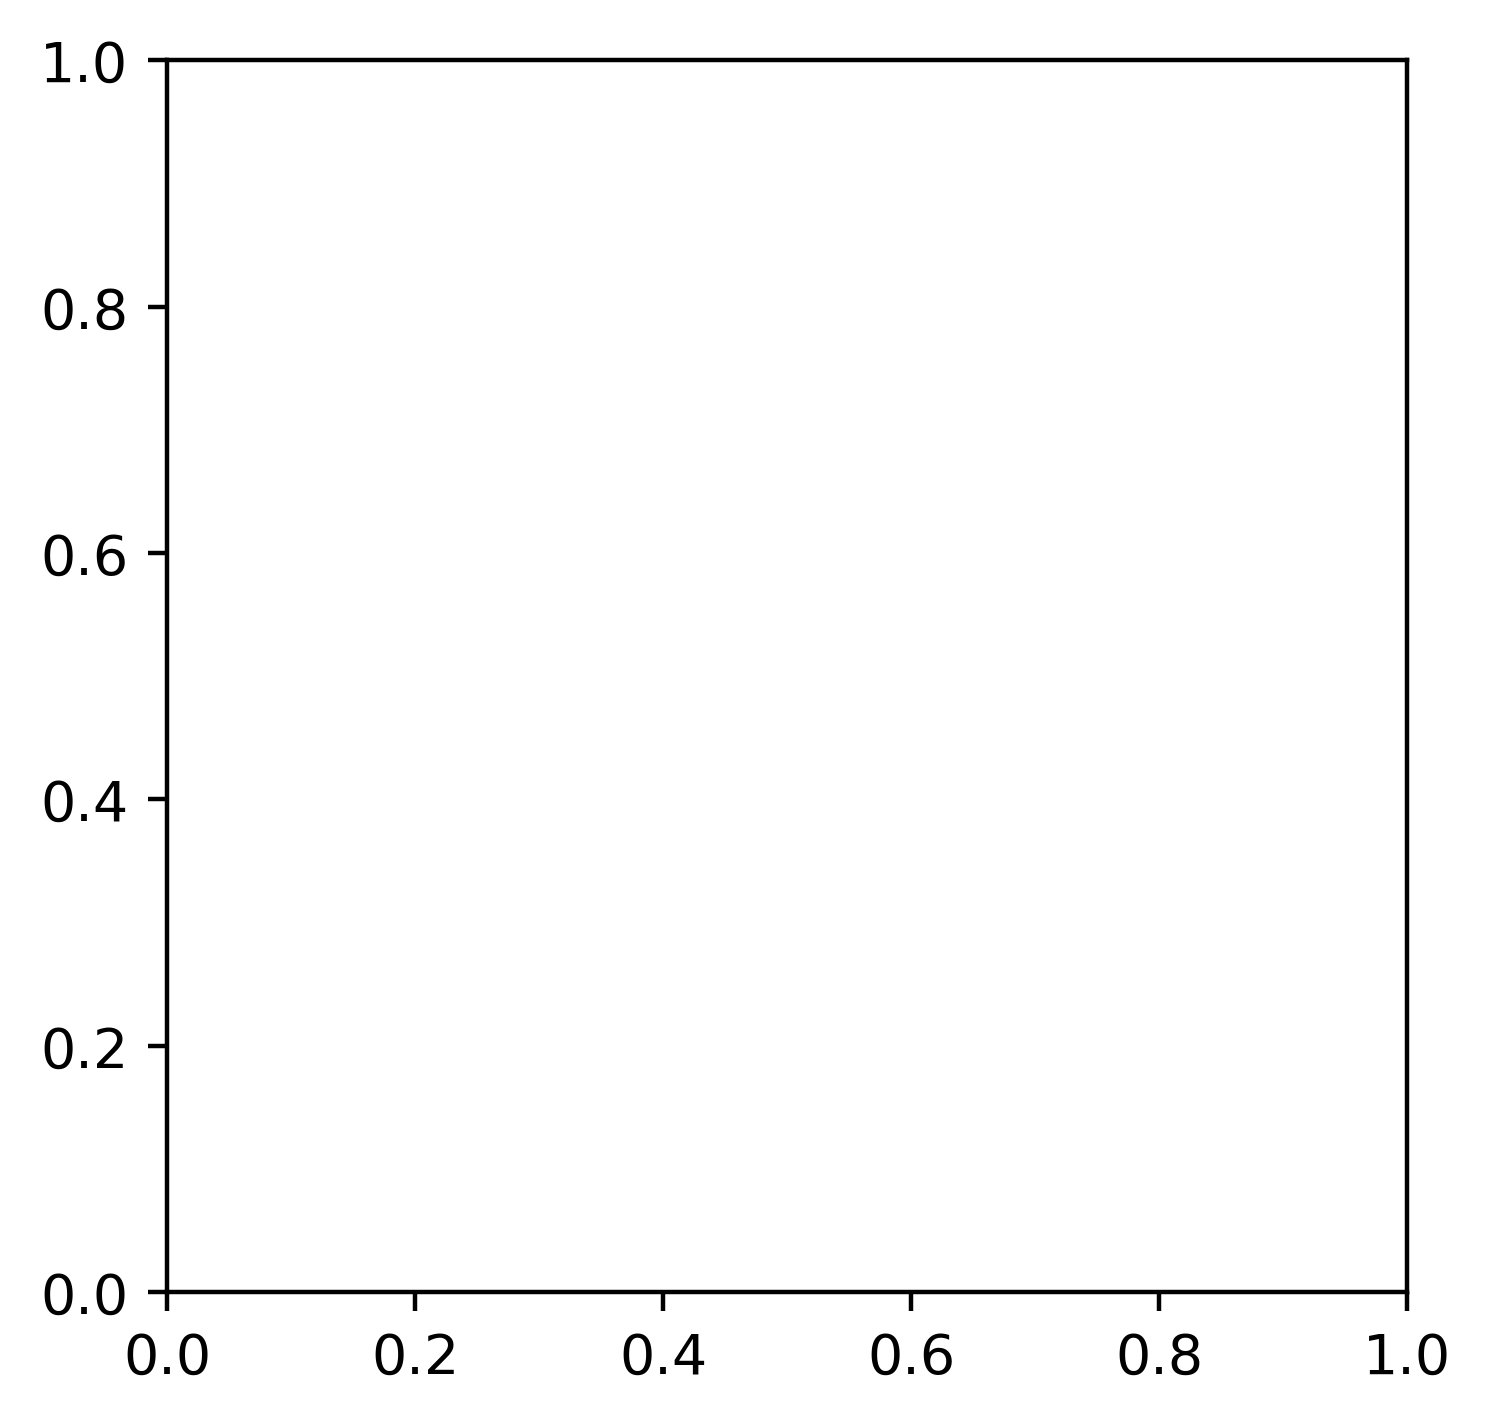

In [35]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=400)
tree.plot_tree(clf, max_depth=5,filled=True,feature_names=dataset.feature_names, class_names = clf.classes_.astype(int).astype(str), rounded=True, node_ids=1)
fig.savefig('arbol.png')